0 1
10 2
50 3
100 4


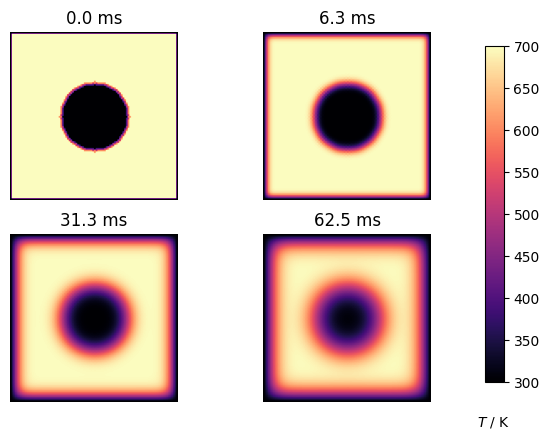

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 > r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('magma'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

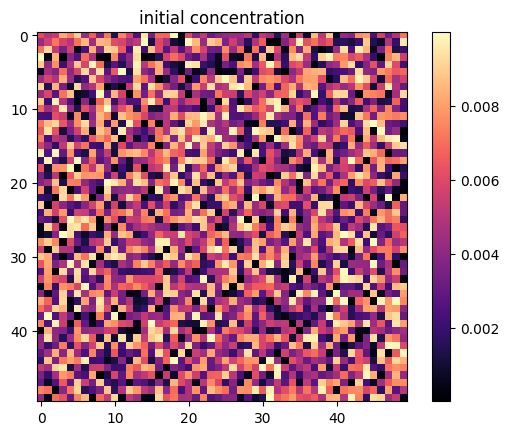

In [2]:
import numpy as np
#from numpy.random import *
import matplotlib.pyplot as plt

nx = 50 # number of computational grids along x direction
ny = nx # number of computational grids along y direction
dx, dy = 0.5, 0.5 # spacing of computational grids [m]
c0 = 0 # average composition of B atom [atomic fraction]

nsteps = 600# total number of time-steps



c = np.zeros((nx,ny)) # zero-clear
c_new = np.zeros((nx,ny)) # zero clear

c = c0 + np.random.rand(nx, ny)*0.01

plt.imshow(c, cmap='magma')
plt.title('initial concentration')
plt.colorbar()
plt.show()


0 1
10 2
50 3
100 4


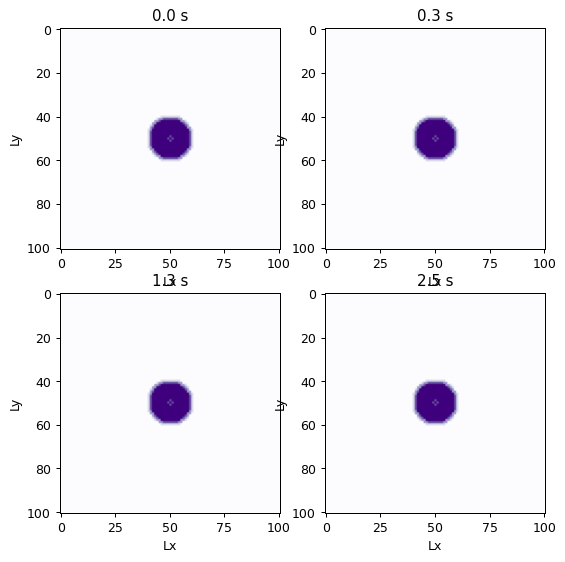

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# constante difusao
D = 1

# parametros da caixa
nx = 101
ny = 101
dx = 0.1
dy = 0.1

# passo de tempo
dt = dx ** 2 * dy ** 2 / (2 * D * (dx ** 2 + dy ** 2))
#dt = (dx * dy / D) * 0.1

# concentracao inicial e concentracao final 
u0 = np.zeros((nx, ny))
u = np.zeros((nx, ny))

#u = u0 + np.random.rand(nx,ny)*0.01

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, dr, x, y = 0, 1, 5, 5
ri2, ro2 = r**2, (r+dr)**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-x)**2 + (j*dy-y)**2
        if ri2 < p2 < ro2:
            u0[i,j] = 2

def do_timestep(u0, u):
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx ** 2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy ** 2 )

    #u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101


# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure(figsize=(8,7),dpi=90)
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u, cmap='Purples')
        plt.xlabel('Lx')
        plt.ylabel('Ly')
        ax.set_title('{:.1f} s'.format(m*dt*10))
fig.subplots_adjust(right=.8)
plt.show()

0 1
10 2
50 3
100 4


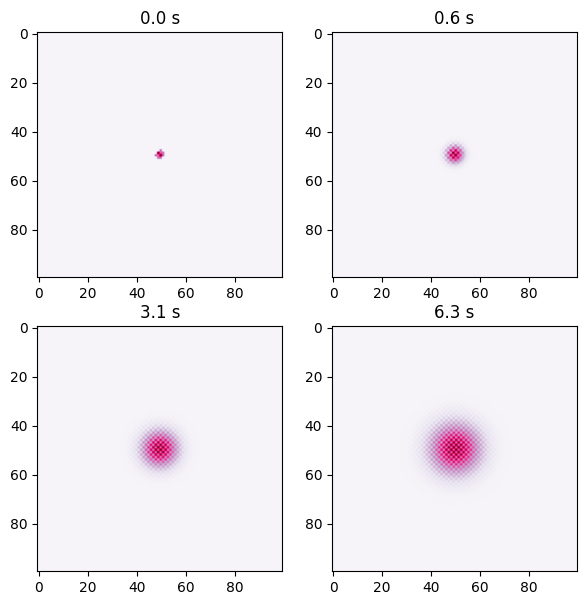

In [6]:

Lx = Ly = 10.

dx = dy = 0.1

D = 4.

Tcool, Thot = 10, 100

nx, ny = int(Lx/dx), int(Ly/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = np.zeros((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 0.1, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 201

# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure(figsize=(8, 7))
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u0, cmap=plt.get_cmap('PuRd'))
        ax.set_title('{:.1f} s'.format(m*dt*100))
fig.subplots_adjust(right=.8)
plt.show()

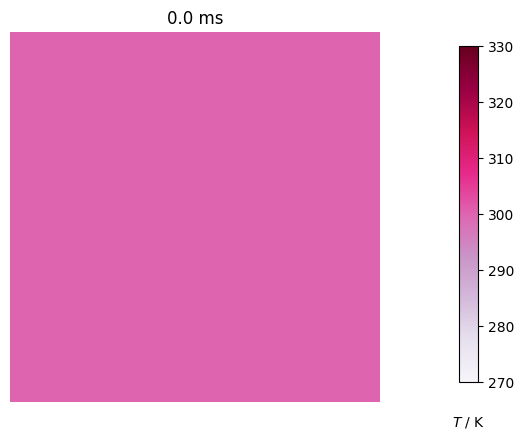

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.5
# Thermal diffusivity of steel, mm2.s-1
D = 1

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - ring of inner radius r, width dr centred at (cx,cy) (mm)
r, dr, cx, cy = 0, 1, 5, 5
ri2, ro2 = r**2, (r+dr)**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if ri2 < p2 < ro2:
            u0[i,j] = Tcool

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 500
fig = plt.figure()
ax = fig.add_subplot()
# The initial image: interpolate for smoothness and use a perceptually uniform
# sequential colourmap.
im = ax.imshow(u0, cmap=plt.get_cmap('PuRd'))
ax.set_axis_off()
ax.set_title('0.0 ms')
# Add in the colourbar on the right.
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)


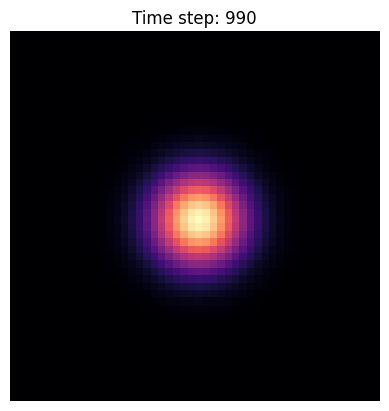

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def diffusion_model(nx, ny, dx, dy, dt, total_time, D):
    # Initialize the concentration matrix
    conc = np.ones((nx, ny))
    conc[int(nx/2), int(ny/2)] = 2

    # Calculate number of time steps
    nt = int(total_time / dt)

    # Time loop
    for i in range(nt):
        # Copy the current concentration to update the values
        conc_new = np.copy(conc)
        # Loop over the grid
        for x in range(1, nx-1):
            for y in range(1, ny-1):
                # Calculate the diffusion
                conc_new[x, y] = conc[x, y] + D * dt * (
                    (conc[x+1, y] - 2 * conc[x, y] + conc[x-1, y]) / dx**2 + 
                    (conc[x, y+1] - 2 * conc[x, y] + conc[x, y-1]) / dy**2
                )
        # Update the concentration
        conc = np.copy(conc_new)
        
        # Plot the concentration every 10th time step
        if i % 10 == 0:
            plt.imshow(conc, cmap='magma')
            plt.axis('off')
            plt.title('Time step: {}'.format(i))
            #plt.savefig('diffusion_step_{}.png'.format(i))

# Define grid parameters
nx = 50
ny = 50
dx = 1
dy = 1
dt = 0.1
total_time = 100
D = 0.1

# Run the diffusion model
diffusion_model(nx, ny, dx, dy, dt, total_time, D)
